# CODE (Lecture 10) - 4 January / 2022

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
import networkx as nx
import math
import random
import collections
from numpy import linalg as la

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



### Integrators

In [137]:
def rk4(f, y0, t,**kwargs): #RK4 integrator
    n = len(t)
    m = len(y0)
    y = np.zeros((n,m))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(y[i], t[i], **kwargs)
        k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h, **kwargs)
        k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h, **kwargs)
        k4 = h * f(y[i] + k3, t[i+1], **kwargs)
        y[i+1] = y[i] + (k1 + 2.0 * ( k2 + k3 ) + k4)/6.0
    return y

### Lorenz System

In [138]:
def Lorenz(y, t=0, sigma=10, rho=28, beta=2.6667):
    dy = np.zeros_like(y)
    dy[0] = sigma * (y[1]-y[0])
    dy[1] = y[0] *(rho-y[2])- y[1]
    dy[2] = y[0]*y[1] - beta*y[2]
    return dy

## Two Coupled Lorenz Systems

In [139]:
def CoupledSystem(state, t=0, alpha=0):
    x1 = state[:3]
    x2 = state[3:]
    coupling = (x1-x2)*alpha
    xdot1 = Lorenz(x1, t) - coupling
    xdot2 = Lorenz(x2, t) + coupling
    return np.concatenate((xdot1,xdot2), axis=0)
    

Critical Coupling Strength, $\alpha_c \approx 0.45$

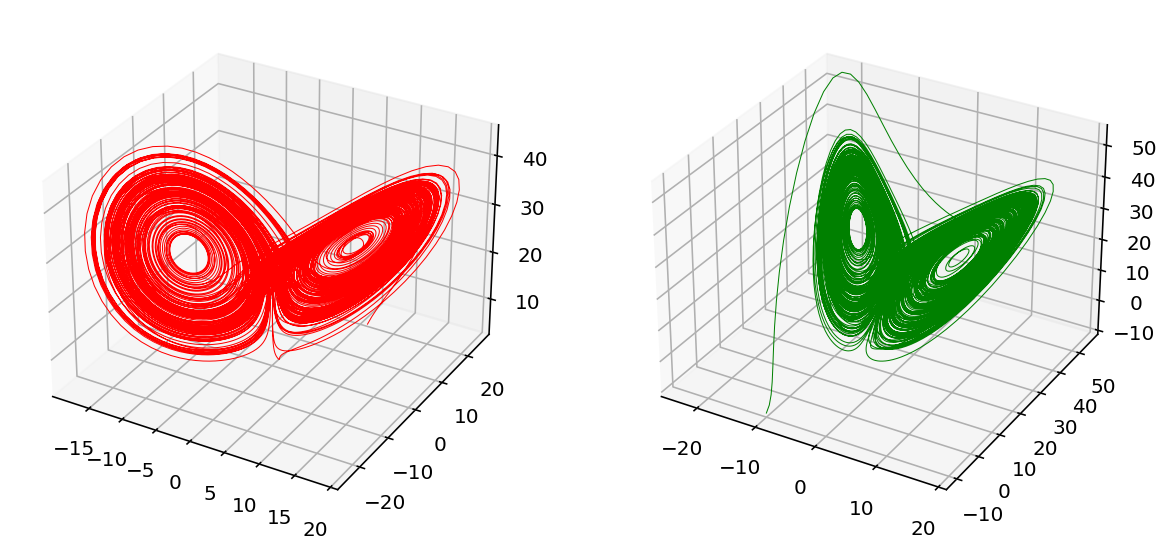

In [140]:
alpha = 0.44
x1zero = [10,10,10]
x2zero = [-10,-10,-10]

t = np.arange(0,200,0.01)

states = rk4(CoupledSystem, np.concatenate((x1zero,x2zero)), t, alpha=alpha)

plt.figure(figsize=(10,5))
plt.subplot(121, projection='3d')
plt.plot(states[:,0],states[:,1],states[:,2], 'r', lw=0.5)
plt.subplot(122, projection='3d')
plt.plot(states[:,3],states[:,5],states[:,5], 'g', lw=0.5)
plt.show()

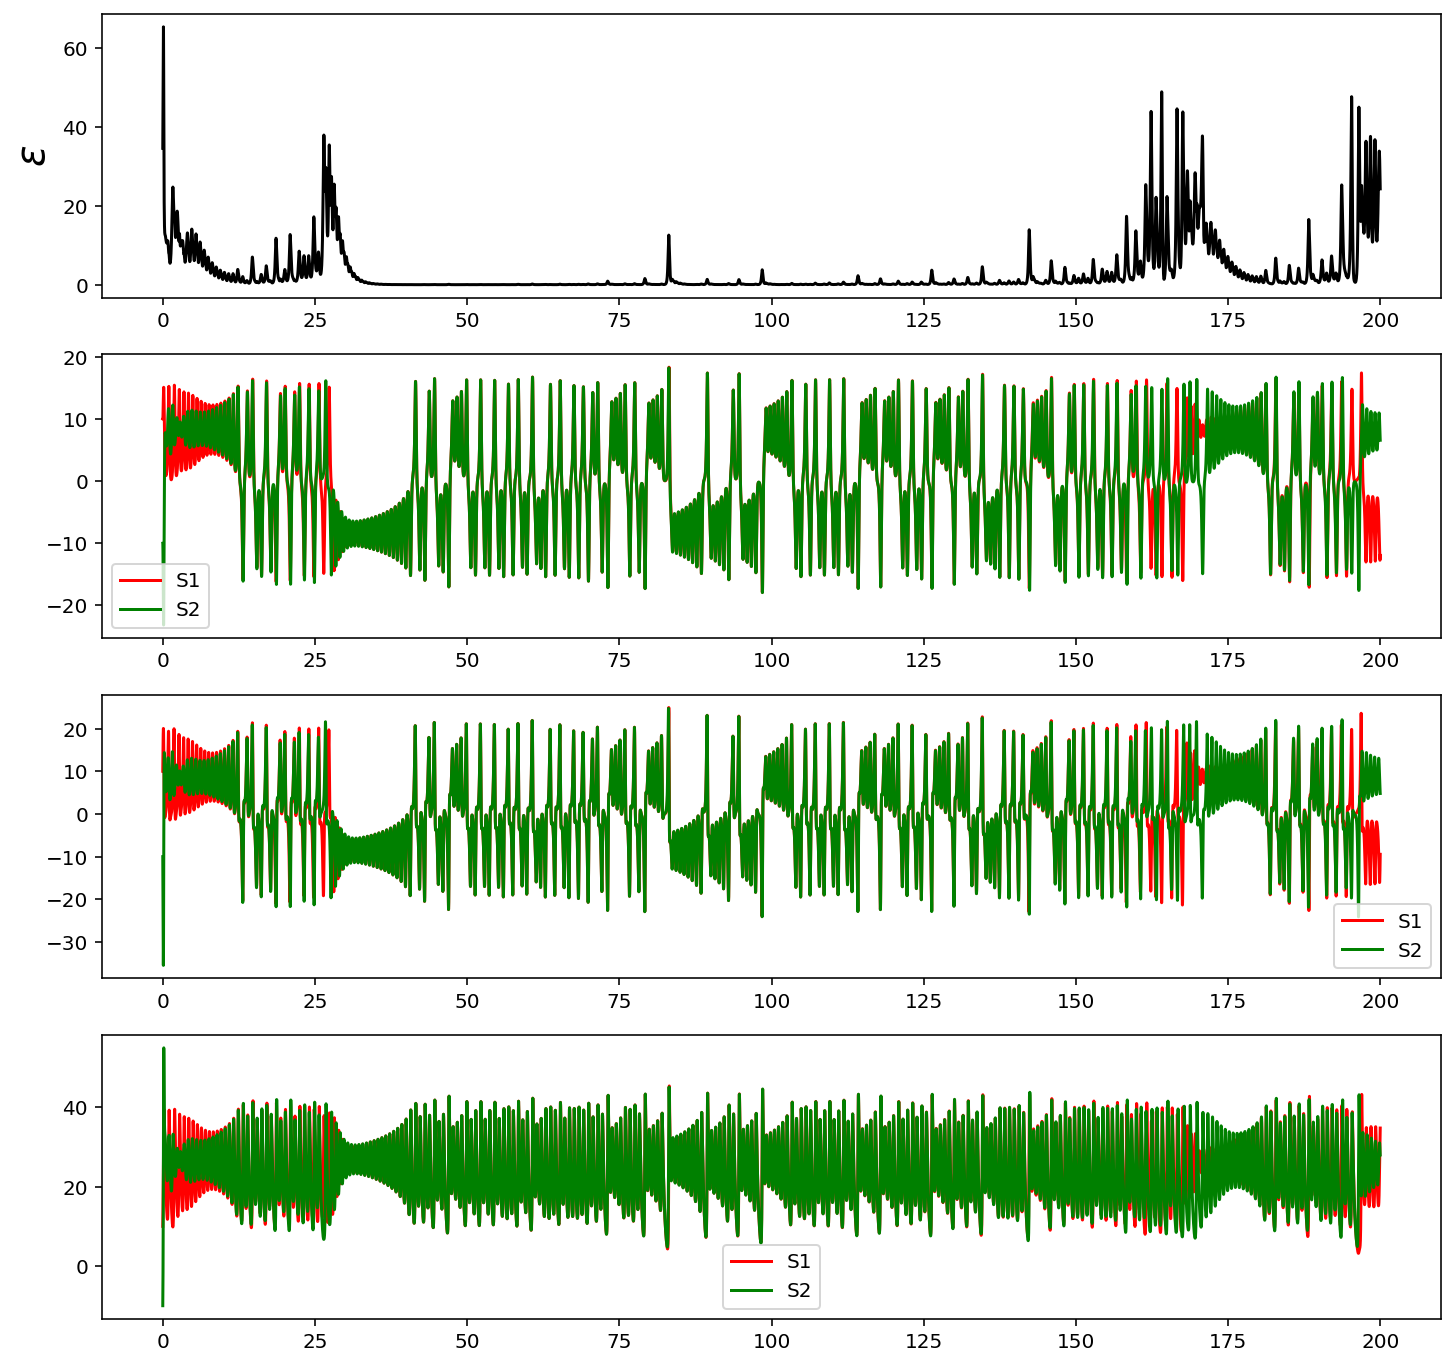

In [141]:
def Dist(x,y):
    d=0
    for i in range(len(x)):
        d+=(x[i]-y[i])**2
    return d**(0.5)

Distance = np.zeros(len(t))
for i in range(0,len(t)):
    Distance[i] = Dist(states[i,:3],states[i,3:])
    
    
plt.figure(figsize=(12,12))
plt.subplot(411) ;plt.plot(t, Distance,'k')
plt.ylabel('$\epsilon$', fontsize=20)
plt.subplot(412); plt.plot(t,states[:,0],'r', label='S1')
plt.plot(t,states[:,3],'g', label='S2');plt.legend()
plt.subplot(413); plt.plot(t,states[:,1],'r', label='S1')
plt.plot(t,states[:,4],'g', label='S2');plt.legend()
plt.subplot(414); plt.plot(t,states[:,2],'r', label='S1')
plt.plot(t,states[:,5],'g', label='S2');plt.legend()
plt.show()

## Networks

In [142]:
def RandomGraph(N, p):
    A = np.zeros(shape=(N,N))
    for i in range(0,N):
        for j in range(0,i):
            if (random.random() < p):
                A[i,j], A[j,i] = 1,1           
    return A

def RingLattice(N, k=1):
    A = np.zeros(shape=(N,N))
    for i in range(0,N):
        for j in range(1,k+1):
            A[i,(i+j)%N],A[(i+j)%N,i] = 1,1
            A[i,(i-j)%N],A[(i-j)%N,i] = 1,1
    return A

def WSGraph(N, k, beta):
    return False

def makeGraph(A, layout=nx.spring_layout):
    G = nx.from_numpy_array(A)
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    nx.draw(G, layout(G), node_size=70)
    plt.subplot(122)
    degree_sequence = sorted([d for n,d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg,cnt = zip(*degreeCount.items())
    plt.bar(deg,cnt,width=0.6,color='r')

    plt.show()
    return G

def Laplacian(A):
    L = np.copy(A)
    for i in range(len(L)):
        L[i,i] = -np.sum(L[i,:])
    return -L

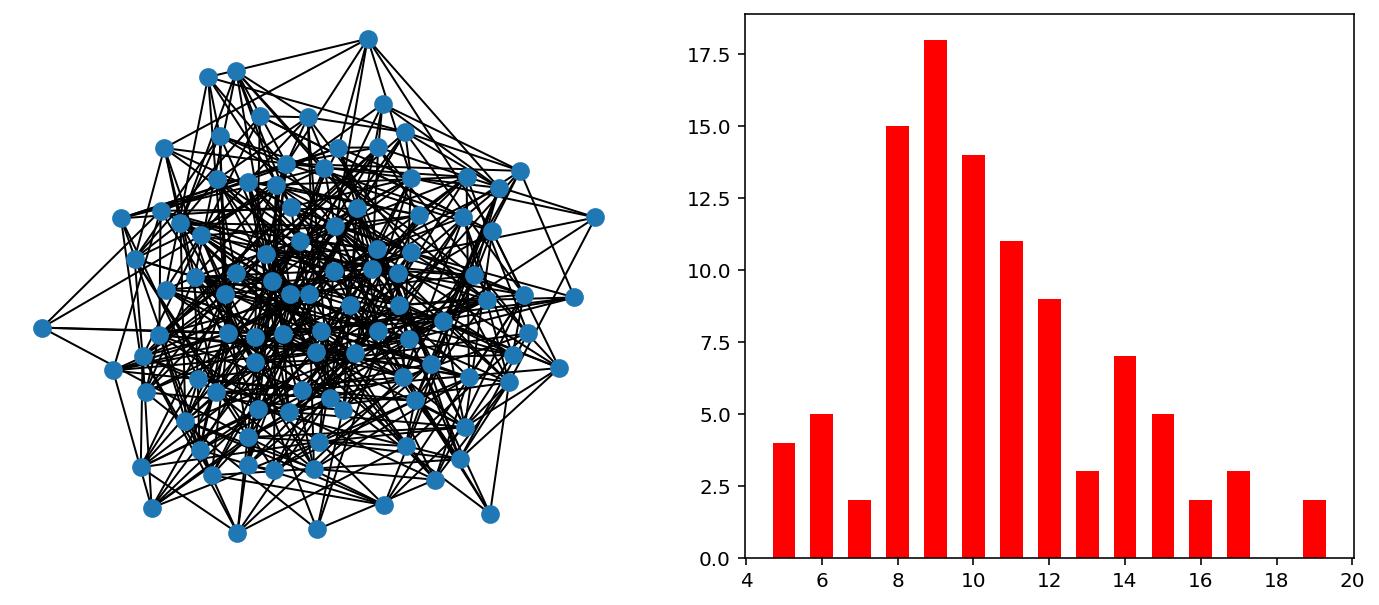

Graph Connected
Spectral Gap (L):  4.032826179840637


In [146]:
A = RandomGraph(100,.1)
L = Laplacian(A)
G = makeGraph(A)

if nx.is_connected(G):
    print('Graph Connected')
    EigenSorted = np.sort(la.eigvals(L))
    print('Spectral Gap (L): ',EigenSorted[1]) 
else:
    print('Graph not Connected')
